# 1. 시각화
'실제 주가 데이터'와 '크롤링 데이터의 긍부정 score'와  비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter
from PIL import Image
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import copy

pd.options.mode.chained_assignment = None  # 경고 숨기기

%matplotlib inline

### 실제 주가 데이터


In [2]:
# 실제 주가 데이터
stock = pd.read_csv('naver_stock_data.csv')
stock['Date'] = pd.to_datetime(stock['Date'])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,199900.0,204000.0,199900.0,204000.0,202795.718750,547388
1,2023-06-02,204500.0,205000.0,202500.0,204500.0,203292.765625,405330
2,2023-06-05,205500.0,206500.0,204000.0,204500.0,203292.765625,428762
3,2023-06-07,206500.0,208000.0,204000.0,205000.0,203789.828125,553505
4,2023-06-08,203000.0,203500.0,200000.0,200500.0,199316.390625,717690
...,...,...,...,...,...,...,...
236,2024-05-21,182100.0,184500.0,182100.0,183200.0,183200.000000,469119
237,2024-05-22,182800.0,183300.0,182300.0,182600.0,182600.000000,316154
238,2024-05-23,181900.0,183000.0,180100.0,182100.0,182100.000000,406392
239,2024-05-24,180300.0,181100.0,179000.0,179000.0,179000.000000,730052


### 기존 긍부정 계산 데이터

In [18]:
news = pd.read_csv('naver_04.SentimentWord_01.csv')
news.head(3)
# 날짜별로 감정점수를 다 더하고 인덱스 초기화
groupby_news = news.groupby('Date')[['Score']].sum().reset_index()
# 날짜가 원래 object 형식이었는데 datetime으로 변환 (그래프 그릴 때 x축 편집에 필요)
groupby_news['Date'] = pd.to_datetime(groupby_news['Date'])
merged_df = pd.merge(groupby_news, stock[['Date', 'Close']], on='Date')
merged_df.head()

,Date,Score,Close
0,2023-06-01,-7,204000.0
1,2023-06-02,5,204500.0
2,2023-06-05,21,204500.0
3,2023-06-07,23,205000.0
4,2023-06-08,7,200500.0


# 비교

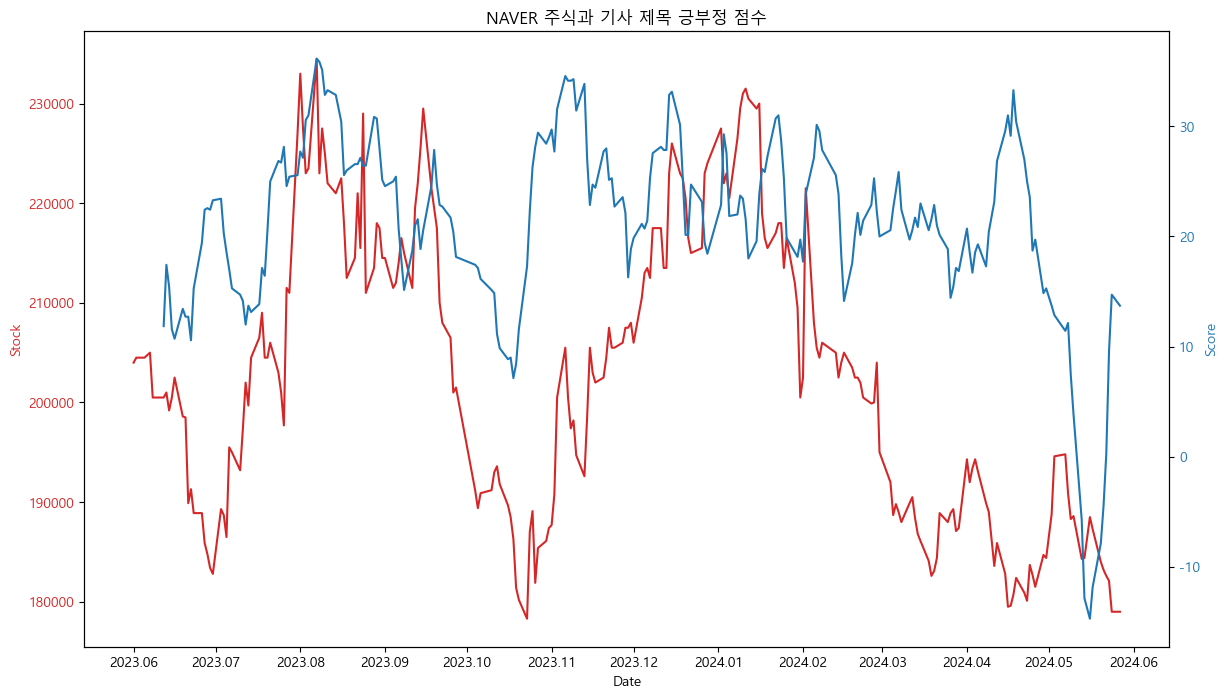

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 그리기 설정
fig, ax1 = plt.subplots(figsize=(14, 8))

# stock : 첫 번째 데이터 세트 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color=color)
ax1.plot(stock['Date'], stock['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 크롤링 : 두 번째 데이터 세트 (오른쪽 y축)
smoothed_scores = merged_df['Score'].rolling(window=7).mean()
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 축 생성
color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(merged_df['Date'], smoothed_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)


# 타이틀과 그리드 설정
ax1.set_title('NAVER 주식과 기사 제목 긍부정 점수')
plt.xticks(rotation=45)
ax1.grid(True)

# X축 날짜 포맷 설정
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 매달 1일만 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))  # 날짜 포맷

# 그래프 표시
plt.show()

---
# 2. 추가 감정 라벨링 후 시각화

### (1) 기존 Word_dict에 추가

In [21]:
# 감정 사전 데이터 불러오기
# from google.colab import files

# uploaded = files.upload()
word_dict_df = pd.read_csv("단어합본.csv")
word_dict_df = word_dict_df.drop(columns=['Unnamed: 0'])
word_dict = word_dict_df.set_index('word').to_dict()['polarity']

In [22]:
### 워드 클라우드, 뉴스 제목 등을 참고해서 점수 매핑
# news.head(50)

# news.tail(50)

# # '카카오' 점수를 위해 맥락 확인 => 카카오와 네이버가 서로 영향을 준다기보다는,  한국의 주요 IT 기업으로 함께 단순 언급되는 경우가 많음 => 0점 처리
# news[news['Stop_tokens'].apply(lambda x: '카카오' in x)].head(50)

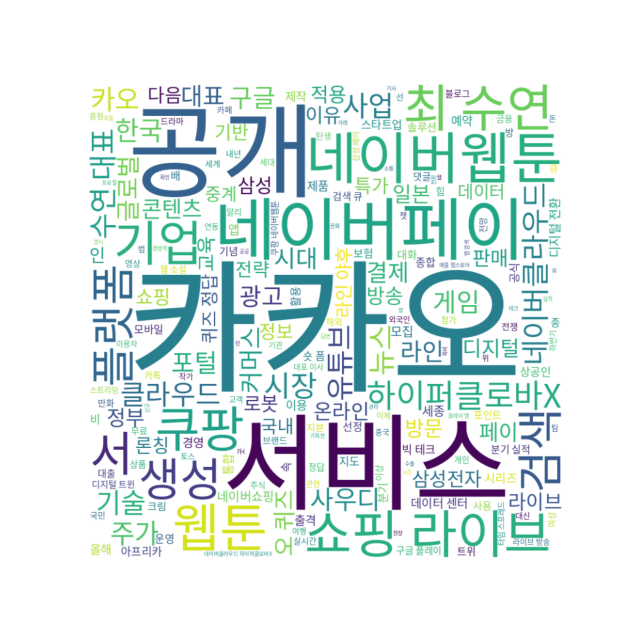

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 저장된 이미지 파일 경로
image_path = 'wordcloud_zero.png'

# 이미지 불러오기
img = mpimg.imread(image_path)

# 이미지 표시
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축을 숨김
plt.show()


In [36]:
# 추가 점수 매핑, 재설정
plus2_word = ['네이버페이', '라이브', '쇼핑', '네이버클라우드', '네이버웹툰', '하이퍼클로바X','플랫폼', '디지털', '공개', '대표', '생성', '기술', '브랜드', '시장', '삼성', '사우디', '한국', '광고', '글로벌', '네이버쇼핑', '데이터','핀테크', '로켓']
plus1_word = ['서비스', '웹툰', '사업', '결제', '수연', '커머스', '클라우드', '데이터', '온라인', '페이', '포털', '스타트업', '방송', '검색', '앱', '활용', '콘텐츠', '교육', '방문',
               '상공인', '로봇', '포인트', '쇼핑', '배송', '왕자', '마켓', '플레이스', '등록', '수요', '학회', '논문']

minus2_word = ['라인', '야후', '정부', '일본', '유튜브', '지분', '알리', '알리바바', '저질', '맹추격','역차별','토론회','한일', '외교','협상','직구', '의무', '별도','먹통', '사태','재난','관리','공정위', '맞대응']
minus1_word = ['뉴스', '쿠팡', '구글','개인', '시대', '중계', '세종', '이유', '숏', '작가', '모니터', '구독', '관리', '책임','토론회','품절', '관계', '별개', '사안', '개미','총출동', '특가', '업무', '기념', '판매', '게임', '삼성전자', '전환', '해외','국적', '국제']

word_lists = [minus2_word, minus1_word, plus1_word, plus2_word]
values = [-2, -1, 1, 2]

# 딕셔너리에 단어들을 추가
for lst, value in zip(word_lists, values):
    for word in lst:
        word_dict[word] = value

### (2) 기존 긍부정 계산 데이터에 추가

In [37]:
def find_sentiment_words(tokens, word_dict):
    pos_words = []
    neg_words = []
    zero_words = []
    sentiment_words = []

    total_polarity = 0

    for token in tokens.split():  # 각 단어를 공백 기준으로 분리
        if token in word_dict:
            sentiment_words.append(token)
            if word_dict[token] > 0:
                pos_words.append(token)
                total_polarity += word_dict[token]
            elif word_dict[token] < 0:
                neg_words.append(token)
                total_polarity += word_dict[token]
            else:
                zero_words.append(token)
        else:
            zero_words.append(token)

    return sentiment_words, pos_words, neg_words, zero_words, total_polarity

# 예제 데이터프레임과 word_dict를 사용하여 결과를 계산
sentiment_results = news['Stop_tokens'].apply(lambda x: find_sentiment_words(x, word_dict))

# 결과 출력
sentiment_results


0       ([금지, 혐오, 정책], [], [금지, 혐오], [표현, 기준, 개정, 정책, ...
1       ([거대, 상공인, 라이브, 커머스, 이유], [거대, 상공인, 라이브, 커머스],...
2        ([악성, 댓글, 악플, 꼬리표], [], [악성, 악플, 꼬리표], [댓글], -5)
3           ([상공인, 브랜드, 구축], [상공인, 브랜드, 구축], [], [중소], 4)
4       ([카카오, 정보, 추가], [추가], [], [카카오, 인물, 정보, 장례, 지도...
                              ...                        
9305    ([브랜드, 협업, 직구, 강화, 시너지, 차별], [브랜드, 협업, 강화, 시너지...
9306    ([카카오, 라인, 야후, 오픈], [오픈], [라인, 야후], [카카오, 해커, ...
9307    ([네이버웹툰, 꿈, 웹툰], [네이버웹툰, 웹툰], [], [꿈, 자유, 오디오,...
9308                    ([삼성], [삼성], [], [출신, 요즘, 국회], 2)
9309    ([수연, 대표, 올해, 서비스], [수연, 대표, 서비스], [], [최, 올해,...
Name: Stop_tokens, Length: 9310, dtype: object

In [38]:
news_addition = copy.copy(news)
news_addition['Sentiment_Word'] = sentiment_results.apply(lambda x: ', '.join(x[0]))
news_addition['Pos_Word'] = sentiment_results.apply(lambda x: ', '.join(x[1]))
news_addition['Neg_Word'] = sentiment_results.apply(lambda x: ', '.join(x[2]))
news_addition['Zero_Word'] = sentiment_results.apply(lambda x: ', '.join(x[3]))
news_addition['Score'] = sentiment_results.apply(lambda x: x[4])

## 추가 라벨링 후 비교

In [39]:
# 날짜별로 감정점수를 다 더하고 인덱스 초기화
groupby_news_addition = news_addition.groupby('Date')[['Score']].sum().reset_index()
# 날짜가 원래 object 형식이었는데 datetime으로 변환 (그래프 그릴 때 x축 편집에 필요)
groupby_news_addition['Date'] = pd.to_datetime(groupby_news_addition['Date'])
merged_df_addition = pd.merge(groupby_news_addition, stock[['Date', 'Close']], on='Date')
merged_df_addition.head()

,Date,Score,Close
0,2023-06-01,41,204000.0
1,2023-06-02,54,204500.0
2,2023-06-05,47,204500.0
3,2023-06-07,75,205000.0
4,2023-06-08,23,200500.0


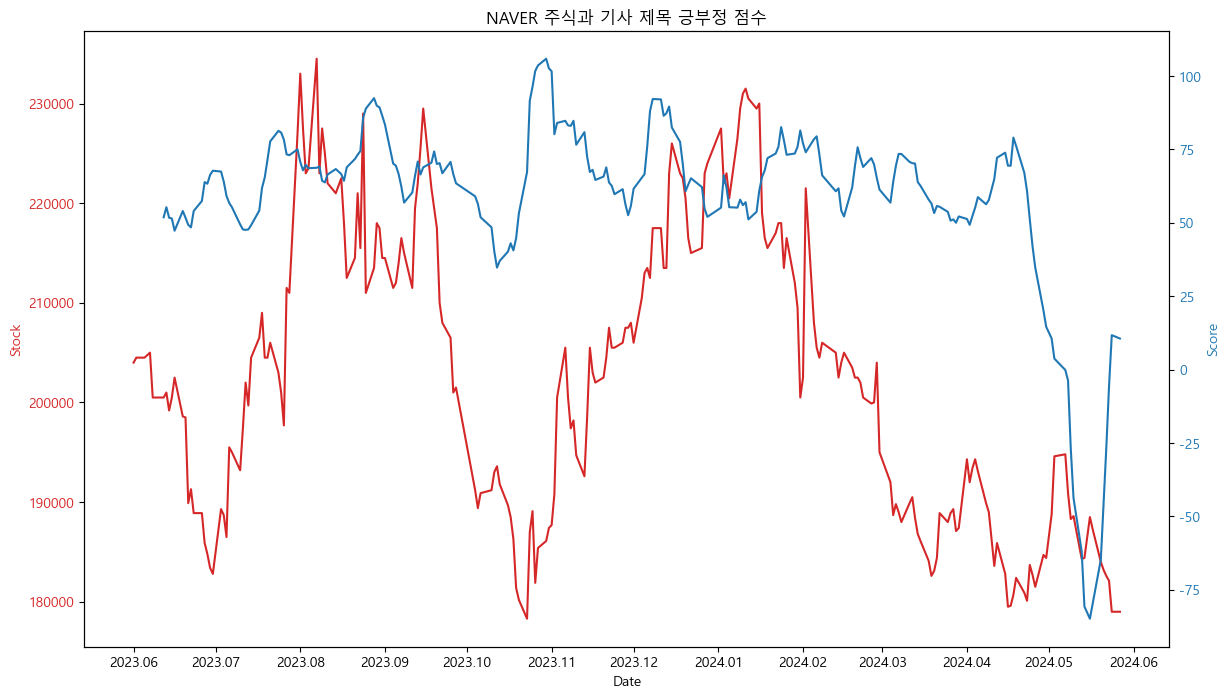

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 그리기 설정
fig, ax1 = plt.subplots(figsize=(14, 8))

# stock : 첫 번째 데이터 세트 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color=color)
ax1.plot(stock['Date'], stock['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 크롤링 : 두 번째 데이터 세트 (오른쪽 y축)
smoothed_scores = merged_df_addition['Score'].rolling(window=7).mean()
ax2 = ax1.twinx()  # 같은 x축을 공유하는 새로운 축 생성
color = 'tab:blue'
ax2.set_ylabel('Score', color=color)
ax2.plot(merged_df_addition['Date'], smoothed_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)


# 타이틀과 그리드 설정
ax1.set_title('NAVER 주식과 기사 제목 긍부정 점수')
plt.xticks(rotation=45)
ax1.grid(True)

# X축 날짜 포맷 설정
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))  # 매달 1일만 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))  # 날짜 포맷

# 그래프 표시
plt.show()

- 추가 라벨링 전
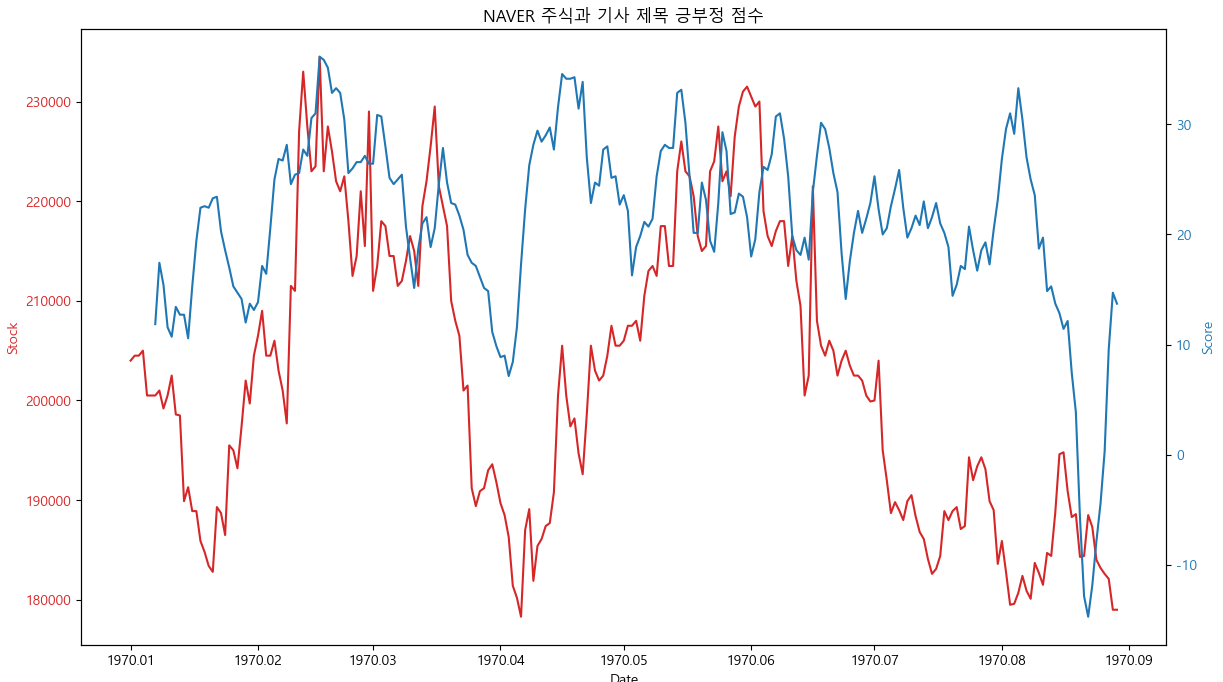

In [ ]:
# 분석 결과
### 오히려 더 안 좋아짐